<a href="https://colab.research.google.com/github/ShreyJais/Quantum-Computing/blob/main/2348558_QC_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementation of  Superdense Coding

In [1]:
!pip install qiskit qiskit_aer pylatexenc

In [2]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [3]:
def superdense_coding(c, d):
    qc = QuantumCircuit(2, 2)
    qc.h(0)  # Hadamard gate on first qubit
    qc.cx(0, 1)  # Controlled-NOT gate

    # Alice's encoding
    # 00 case: no gates needed
    if c == 0 and d == 1:
        qc.z(0)  # Z gate (phase flip)
    elif c == 1 and d == 0:
        qc.x(0)  # X gate (bit flip)
    elif c == 1 and d == 1:
        qc.z(0)  # Z gate
        qc.x(0)  # X gate

    # Bob's decoding
    qc.cx(0, 1)  # Controlled-NOT
    qc.h(0)      # Hadamard

    # Measure both qubits
    qc.measure([0,1], [0,1])

    display(qc.draw(output="mpl"))

    simulator = AerSimulator()
    job = simulator.run(qc, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)

    plot_histogram(counts)
    plt.show()
    return counts

Sending bits c=0, d=0


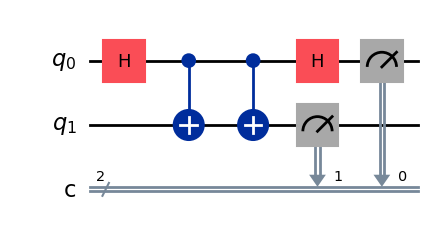

Received: 00, Count: 1024
------------------------------
Sending bits c=0, d=1


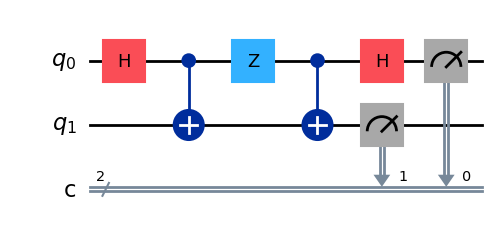

Received: 01, Count: 1024
------------------------------
Sending bits c=1, d=0


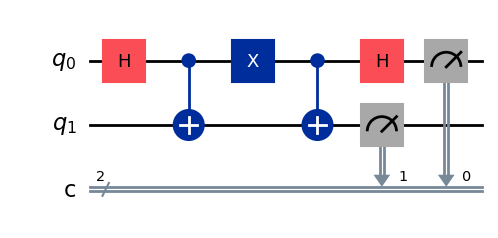

Received: 10, Count: 1024
------------------------------
Sending bits c=1, d=1


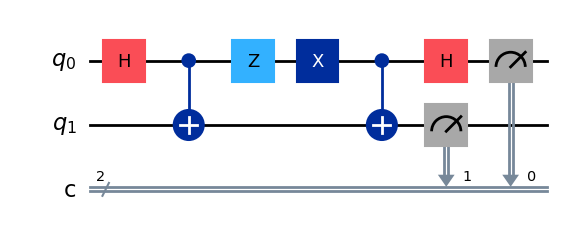

Received: 11, Count: 1024
------------------------------


In [4]:
def run_superdense_coding():
    """
    superdense coding for all possible bit combinations
    """
    bit_combinations = [
        (0, 0),  # 00
        (0, 1),  # 01
        (1, 0),  # 10
        (1, 1)   # 11
    ]

    results = {}

    for c, d in bit_combinations:
        print(f"Sending bits c={c}, d={d}")
        result = superdense_coding(c, d)

        # Verify received bits
        for bits, count in result.items():
            print(f"Received: {bits}, Count: {count}")
        print("-" * 30)
        results[(c, d)] = result

    return results

Results = run_superdense_coding()

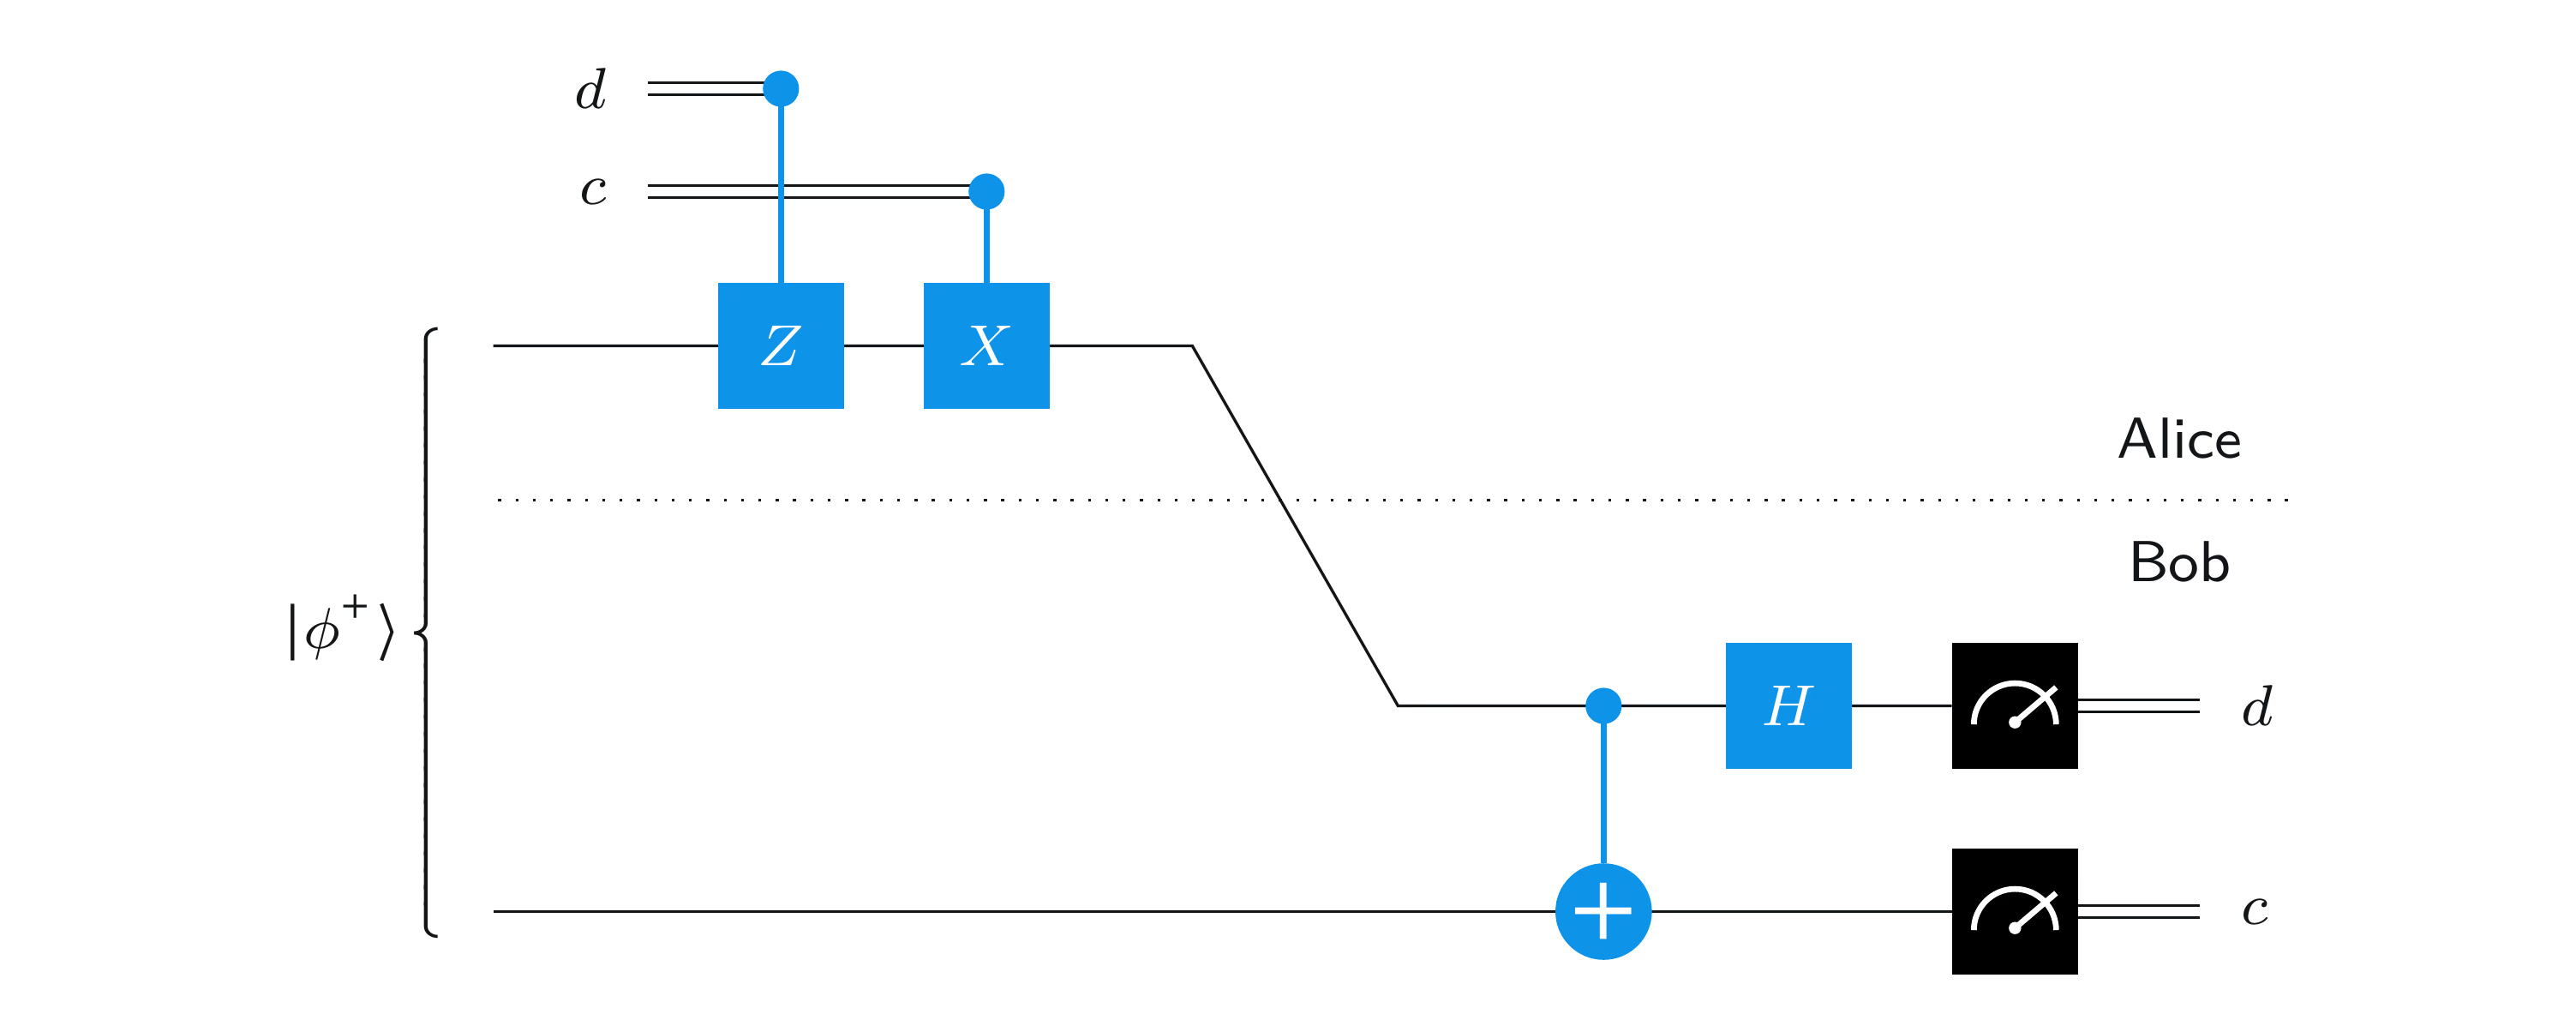